# Credit Card fraud Detection

### Task-Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.


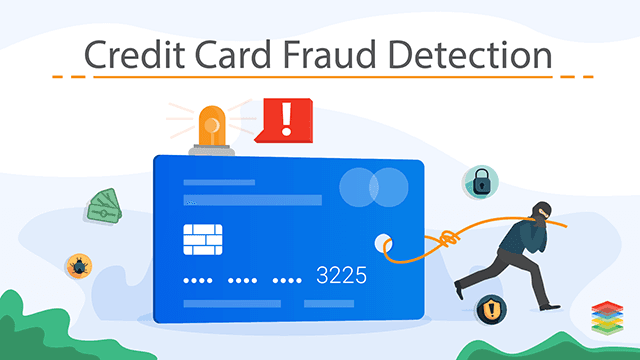

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing Dataset

In [2]:
sp=pd.read_csv("C:/Users/admin/Desktop/CODSOFT/Credit card fraud Detection.csv")

### Dataset

In [3]:
sp

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
sp=sp.drop(columns="Unnamed: 0")

### dataset details

In [5]:
type(sp)

pandas.core.frame.DataFrame

In [6]:
sp.shape

(1296675, 22)

In [7]:
sp.size

28526850

In [8]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [9]:
sp.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [10]:
sp.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
sp.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
sp.sample()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
756399,2019-11-19 11:41:45,4239552724014407,fraud_Kutch and Sons,grocery_pos,98.08,Carl,Hernandez,M,9134 Darryl Flat Suite 916,Paulding,...,41.141,-84.5722,6284,Secondary school teacher,1936-03-27,ffbc2cbb3cb6f7b2c6fba41fbac6e238,1353325305,41.808656,-84.124654,0


In [13]:
sp.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [14]:
sp.tail(15)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296660,2020-06-21 12:07:54,4040099974063068803,fraud_Cartwright PLC,kids_pets,49.93,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,...,48.3396,-102.2400,229,Administrator,1983-03-20,de289ff4302f93f9de1ebf1b0152a8ff,1371816474,48.724332,-102.379390,0
1296661,2020-06-21 12:08:08,3586955669388457,fraud_Lynch-Wisozk,home,77.83,Benjamin,Rogers,M,24191 Elizabeth Mill,Bolivar,...,40.3673,-79.1605,1770,"Administrator, local government",1994-12-08,cc47f72c6ed03fbf25c724690c2aedfa,1371816488,40.372477,-79.115942,0
1296662,2020-06-21 12:08:13,346273234529002,"fraud_Lubowitz, Terry and Stracke",personal_care,157.69,Donna,Moreno,F,32301 Albert River Suite 364,Ronceverte,...,37.7418,-80.4626,4575,Statistician,1991-10-22,42d93aef20d9be92f38f4d1f04671b88,1371816493,37.918700,-80.800598,0
1296663,2020-06-21 12:08:32,4335531783520911,"fraud_Witting, Beer and Ernser",home,84.10,Amy,Daugherty,F,852 Thomas Well Suite 339,Owensville,...,38.3511,-91.4867,6703,Naval architect,1998-05-20,0a2e7ce8ee5f33346f54f9a9605dd335,1371816512,39.193343,-91.016642,0
1296664,2020-06-21 12:08:36,3531129874770000,"fraud_Larkin, Stracke and Greenfelder",entertainment,69.38,Shelby,Mitchell,F,974 Cindy Stream,Brandon,...,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,be0ac1fd89b5d91d5032c052d70e8ed2,1371816516,43.808957,-72.277168,0
1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,Pointe Aux Pins,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,Haines City,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,Florence,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,North Loup,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0


In [15]:
#finding missing values
sp.isnull()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
sp.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
sp.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [18]:
sp.loc[20]

trans_date_trans_time                 2019-01-01 00:13:08
cc_num                                4469777115158234880
merchant                               fraud_Bauch-Raynor
category                                      grocery_pos
amt                                                 57.34
first                                             Gregory
last                                               Graham
gender                                                  M
street                                    4005 Dana Glens
city                                              Methuen
state                                                  MA
zip                                                  1844
lat                                                42.728
long                                              -71.181
city_pop                                            47249
job                                     Market researcher
dob                                            1980-11-22
trans_num     

In [19]:
sp.iloc[2:10]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [20]:
sp.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [21]:
#To convert categorical values to categorical code
sp['trans_date_trans_time']=sp['trans_date_trans_time'].astype('category')
sp['trans_date_trans_time']=sp['trans_date_trans_time'].cat.codes

sp['merchant']=sp['merchant'].astype('category')
sp['merchant']=sp['merchant'].cat.codes

sp['category']=sp['category'].astype('category')
sp['category']=sp['category'].cat.codes

sp['first']=sp['first'].astype('category')
sp['first']=sp['first'].cat.codes

sp['last']=sp['last'].astype('category')
sp['last']=sp['last'].cat.codes

sp['gender']=sp['gender'].astype('category')
sp['gender']=sp['gender'].cat.codes

sp['street']=sp['street'].astype('category')
sp['street']=sp['street'].cat.codes

sp['city']=sp['city'].astype('category')
sp['city']=sp['city'].cat.codes

sp['state']=sp['state'].astype('category')
sp['state']=sp['state'].cat.codes

sp['job']=sp['job'].astype('category')
sp['job']=sp['job'].cat.codes

sp['dob']=sp['dob'].astype('category')
sp['dob']=sp['dob'].cat.codes

sp['trans_num']=sp['trans_num'].astype('category')
sp['trans_num']=sp['trans_num'].cat.codes



In [22]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  int32  
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  int16  
 3   category               1296675 non-null  int8   
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  int16  
 6   last                   1296675 non-null  int16  
 7   gender                 1296675 non-null  int8   
 8   street                 1296675 non-null  int16  
 9   city                   1296675 non-null  int16  
 10  state                  1296675 non-null  int8   
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

### importing models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [24]:
sp.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### seperating Independent and Dependent values

In [25]:
X=sp[['amt','lat','long','city_pop','unix_time','merch_lat','merch_long']]
y=sp['is_fraud']


In [26]:
X

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,51.70,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,105.93,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,74.90,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [27]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

### Splitting the dataset into training and testing sets

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Scaling

In [29]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
X_train

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
330201,6.51,30.6576,-91.6264,1178,1338993811,31.189017,-91.426377
798518,20.17,48.3400,-122.3456,85,1354562808,47.373663,-122.739095
1260375,35.85,32.3836,-94.8653,24536,1370692963,31.989881,-95.371119
412511,42.21,44.8605,-85.8138,3096,1341539214,45.377530,-86.450595
344644,57.24,41.5378,-88.0572,128354,1339371240,42.372906,-87.112752
...,...,...,...,...,...,...,...
110268,72.38,45.8327,-91.0144,1478,1330829368,45.043710,-90.231846
259178,2.33,41.4682,-72.5751,5438,1336546444,40.711495,-71.670634
131932,118.27,35.0203,-106.5503,310,1331675187,34.849069,-106.219762
671155,5.60,48.6669,-96.5969,140,1350120506,47.807830,-97.498754


In [31]:
y_train

330201     0
798518     0
1260375    0
412511     0
344644     0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: is_fraud, Length: 1037340, dtype: int64

In [32]:
X_test

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
1045211,194.51,40.6153,-79.4545,972,1362841766,40.420453,-78.865012
547406,52.32,42.8250,-124.4409,217,1345650541,42.758860,-123.636337
110142,6.53,39.9636,-79.7853,184,1330824856,40.475159,-78.898190
1285953,7.33,42.9580,-77.3083,10717,1371413078,43.767506,-76.542384
271705,64.29,41.6423,-104.1974,635,1336974888,41.040392,-104.092324
...,...,...,...,...,...,...,...
402969,52.17,40.4603,-79.0097,922,1341171376,40.610144,-79.533882
1121903,42.34,20.0271,-155.3697,1490,1365773148,19.051052,-155.629498
55293,95.79,41.1826,-92.3097,1583,1328218965,41.491479,-91.379111
1150396,5.64,36.9688,-78.5615,1970,1366841263,36.199971,-79.548140


In [33]:
y_test

1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
402969     0
1121903    0
55293      0
1150396    0
658150     0
Name: is_fraud, Length: 259335, dtype: int64

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [36]:
model.predict(X_test)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
y_pred=model.predict(X_test_scaled)

In [38]:
model.predict(X_train)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.993587444810766
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[257672    143]
 [  1520      0]]


In [40]:
model.score(X_test,y_test)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9941388551487458

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
model.predict(X_test)

array([ 0.0185487 ,  0.00367759, -0.00034826, ...,  0.00907719,
       -0.0014575 ,  0.00013007])

In [43]:
y_pred=model.predict(X_test_scaled)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
model.score(X_test,y_test)

0.04637728135256902

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_pred=model.predict(X_test_scaled)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [48]:
model.score(X_test,y_test)

0.9928972178842038

### Naive_Bayes(Gaussian NB)

In [49]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [50]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
y_pred=model.predict(X_test_scaled)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [52]:
model.score(X_test,y_test)

0.9883509746081324

### Total Score

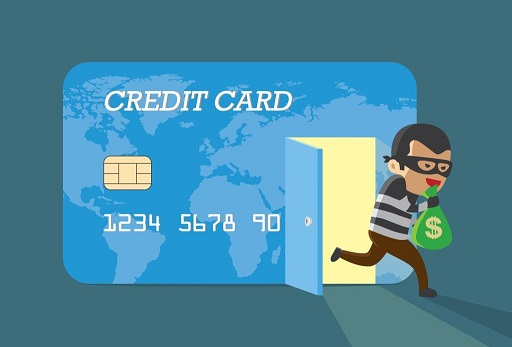

##### Logistic Regression    - 0.9941388551487458                                                                         


##### Linear Regression         - 0.04637728135256902


##### DecisionTreeClassifier - 0.9928972178842038


##### Naive_Bayes(GaussianNB)- 0.9883509746081324